In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, num_obs_linkage
import numpy as np
import matplotlib.pyplot as plt

[[ 0.          1.          1.41421356  2.        ]
 [ 4.          5.          1.41421356  2.        ]
 [ 6.          7.          1.41421356  2.        ]
 [ 8.         11.          1.70710678  3.        ]
 [ 2.          9.          1.73205081  3.        ]
 [ 3.         10.          2.18890106  3.        ]
 [13.         14.         11.531689    6.        ]
 [12.         15.         19.90368261  9.        ]]


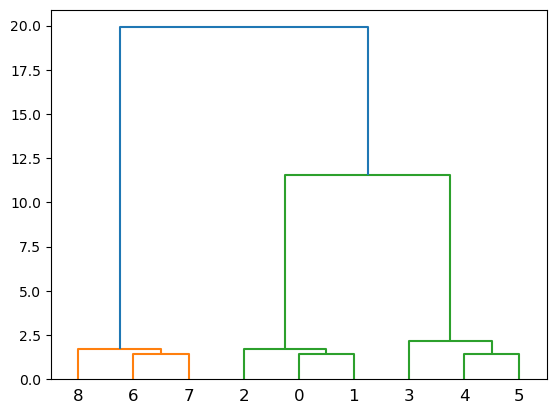

In [61]:
def plot_dendrogram(data):
    """
    Plot a dendrogram for hierarchical clustering.
    
    Parameters:
        data (numpy.ndarray): The data for clustering.
    
    Returns:
        None
    """
    # Perform hierarchical clustering
    linkage_matrix = linkage(data, method='average')
    
    # Create the dendrogram
    dendrogram(linkage_matrix, orientation='top')
    
    # Display the plot
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Data Point Index')
    plt.ylabel('Distance')
    plt.show()



# Example usage:
data1 = np.array([
    [1, 2, 3, 4],
    [2, 2, 3, 3],
    [2, 3, 4, 4],
    [8, 8, 7, 8],
    [9, 8, 8, 9],
    [9, 9, 8, 10],
    [15, 15, 14, 16],
    [16, 15, 14, 17],
    [16, 16, 15, 17]
])

data2 = np.array([
    [1, 2, 3],
    [2, 2, 3],
    [2, 3, 4],
    [8, 8, 7],
    [9, 8, 8],
    [9, 9, 8],
    [15, 15, 14],
    [16, 15, 14],
    [16, 16, 15],
    [4, 4, 4],
    [5, 5, 4],
    [6, 5, 4],
    [7, 8, 7],
    [8, 8, 8],
    [8, 9, 9],
    [14, 15, 14],
    [15, 15, 15],
    [15, 16, 16],
    [3, 3, 4],
    [4, 3, 4],
    [4, 4, 3],
])

# The data now contains 21 data points with 3 features each.
    # Plot the dendrogram


# Perform hierarchical clustering with the chosen number of clusters
linkage_matrix = linkage(data1, method='average')

print(linkage(data1, method='average'))
dendrogram_info = dendrogram(linkage_matrix)


In [66]:
def find_all_leaves(Z):
    leaves = list()

    for row in Z:
        branch = []
        find_leaves(Z,row, branch)
        leaves.append(branch)
    
    return leaves

def find_leaves(Z, row, leaves=None):
    if leaves is None:
        leaves = []

    maxlen = int(Z[-1, -1]) - 1
    lefti = int(row[0])
    righti = int(row[1])

    if lefti <= maxlen:
        leaves.append(lefti)
    else:
        newrow = Z[lefti - maxlen-1]
        find_leaves(Z, newrow, leaves)

    if righti <= maxlen:
        leaves.append(righti)
    else:
        newrow = Z[righti - maxlen-1]
        find_leaves(Z, newrow,leaves)
         
    return leaves

In [67]:
find_all_leaves(linkage_matrix)

[[0, 1],
 [4, 5],
 [6, 7],
 [8, 6, 7],
 [2, 0, 1],
 [3, 4, 5],
 [2, 0, 1, 3, 4, 5],
 [8, 6, 7, 2, 0, 1, 3, 4, 5]]

In [75]:
from sklearn.datasets import make_blobs
import pandas as pd

blobs, labels = make_blobs(n_samples=65000, n_features=10)
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,-11.121812,2.868116,-5.311310,-7.897170,11.478694,-0.525483,-6.672372,-3.484666,10.718315,1.186396
1,0.989551,-7.219119,4.667880,-8.414897,-2.928636,-4.570908,-0.579200,0.306488,10.796096,1.596210
2,-7.677073,2.527193,-6.432013,-7.082887,10.432111,-1.129238,-5.691516,-3.029381,10.760776,1.456938
3,0.296250,-7.183769,4.626173,-5.321520,0.109381,-3.308127,-1.067701,-2.887318,7.779323,0.134917
4,-10.839452,1.081518,-4.630578,-7.156128,11.088179,-0.084685,-6.589619,-3.420438,10.256040,0.119221


In [76]:
linkage_matrix = linkage(blobs, method='average')